### Kaggle Titanic Problem


use panda to load the data

In [3]:
import pandas as pd 
import numpy as np 
from pandas import Series,DataFrame

data_train = pd.read_csv("train.csv")
print(data_train.columns)
data_train[data_train.Cabin.notnull()]['Survived'].value_counts()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


1    136
0     68
Name: Survived, dtype: int64

## Basic Information 

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The mean value of Survived told us there are only 0.383838 people get at chance to live in the end , and the average age is 29.7

## Check feature distribution 

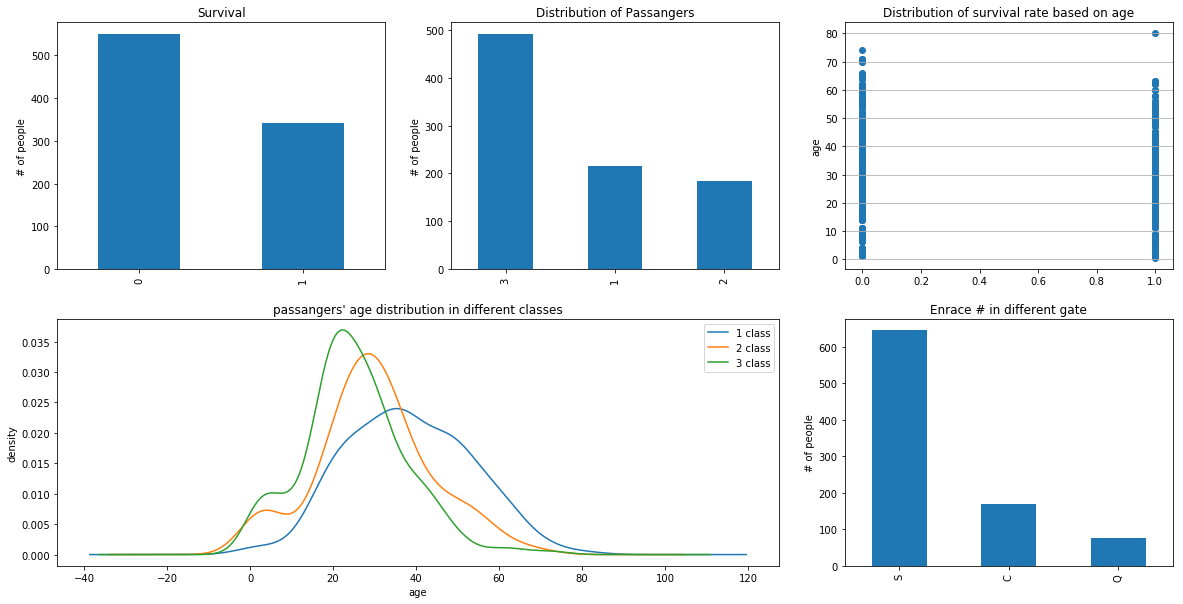

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha=0.2) 
plt.figure(figsize=(20,10))

plt.subplot2grid((2,3),(0,0))             
data_train.Survived.value_counts().plot(kind='bar')# plots a bar graph of those who surived vs those who did not. 
plt.title(u"Survival") # puts a title on our graph
plt.ylabel(u"# of people")  

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"# of people")
plt.title(u"Distribution of Passangers")

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel(u"age")                         # sets the y axis lable
plt.grid(b=True, which='major', axis='y') # formats the grid line style of our graphs
plt.title(u"Distribution of survival rate based on age")


plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel desnsity estimate of the subset of the 1st class passanges's age
data_train.Age[data_train.Pclass == 1].plot(kind='kde')   
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"age")# plots an axis lable
plt.ylabel(u"density") 
plt.title(u"passangers' age distribution in different classes")
plt.legend((u'1 class', u'2 class',u'3 class'),loc='best') # sets our legend for our graph.


plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"Enrace # in different gate")
plt.ylabel(u"# of people")  
plt.show()


Survival Rate of passangers' in different classes

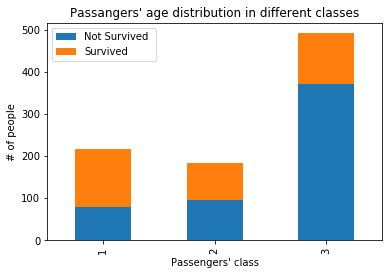

In [32]:
fig = plt.figure(figsize=(8,6))
fig.set(alpha=0.2) 
Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'Survived':Survived_1, u'Not Survived ':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"Passangers' age distribution in different classes")
plt.xlabel(u"Passengers' class") 
plt.ylabel(u"# of people") 

plt.show()

Survival Rate for passengers' in different embarked groups 

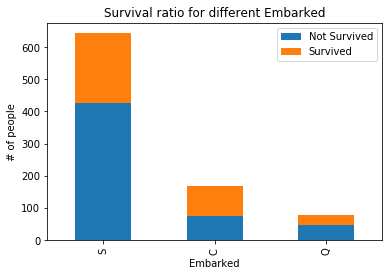

In [17]:
fig = plt.figure()
fig.set(alpha=0.2) 

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'Survived':Survived_1, u'Not Survived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"Survival ratio for different Embarked")
plt.xlabel(u"Embarked") 
plt.ylabel(u"# of people") 

plt.show()

Survival Rate for different gender groups

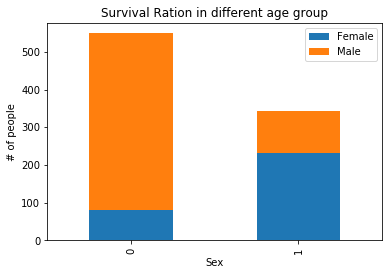

In [18]:
#survival rate in different gender 
fig = plt.figure()
fig.set(alpha=0.2)  

Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df=pd.DataFrame({u'Male':Survived_m, u'Female':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title(u"Survival Ration in different age group")
plt.xlabel(u"Sex") 
plt.ylabel(u"# of people")
plt.show()

Survival Rate of different gender groups in different classes

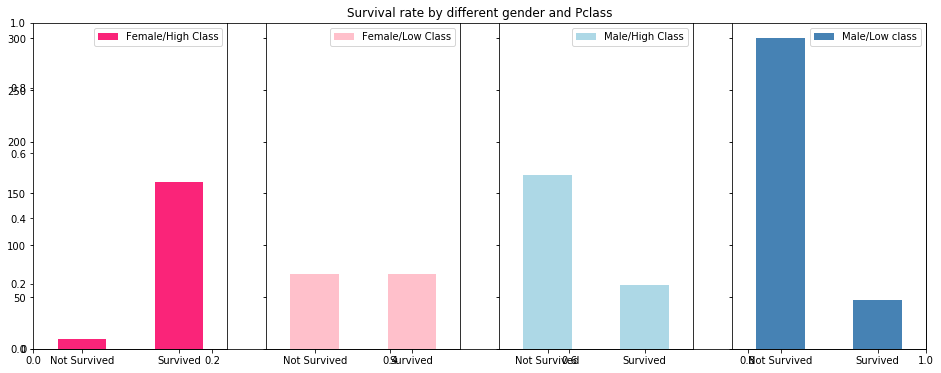

In [39]:
#survival rate for different gender in different passanger class
fig=plt.figure(figsize=(16,6))
fig.set(alpha=0.65) 
plt.title(u"Survival rate by different gender and Pclass")

ax1=fig.add_subplot(141)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts(sort=False).plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels([u"Not Survived", u"Survived"], rotation=0)
ax1.legend([u"Female/High Class"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts(sort=False).plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"Not Survived", u"Survived"], rotation=0)
plt.legend([u"Female/Low Class"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts(sort=False).plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"Not Survived", u"Survived"], rotation=0)
plt.legend([u"Male/High Class"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts(sort=False).plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"Not Survived", u"Survived"], rotation=0)
plt.legend([u"Male/Low class"], loc='best')

plt.show()

In [40]:
#Dose have sibling feature help with the survival rate?
g = data_train.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7

In [168]:
g = data_train.groupby(['Parch','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1

In [41]:
#only 204 cabin has value, let's see the distribution
data_train.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F2             3
E101           3
D              3
F33            3
C22 C26        3
C78            2
E121           2
F G73          2
E33            2
E44            2
B28            2
D17            2
C124           2
E24            2
B22            2
E25            2
D20            2
E67            2
C123           2
B49            2
E8             2
D33            2
F4             2
C2             2
B51 B53 B55    2
D35            2
C83            2
              ..
D7             1
C95            1
F E69          1
D30            1
C87            1
B80            1
C111           1
D28            1
A32            1
B41            1
A10            1
B71            1
F38            1
C148           1
B4             1
B42            1
C45            1
C110           1
C30            1
D15            1
B3             1
C128           1
C70            1
B78            1
C54            1
C91            1
D50            1
D45           

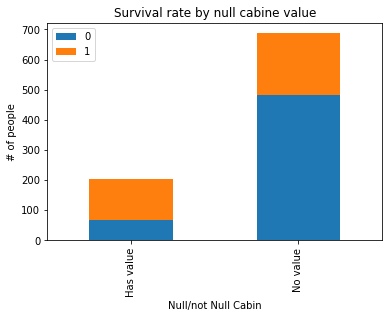

In [43]:
#The value of cabin is too scattered, with many unique value. 
#treate the cabine value as binary feature, null / notnull 
fig = plt.figure()
fig.set(alpha=0.2)  

Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df=pd.DataFrame({u'Has value':Survived_cabin, u'No value':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"Survival rate by null cabine value")
plt.xlabel(u"Null/not Null Cabin") 
plt.ylabel(u"# of people")
plt.show()


## Imputation of Missing Data

Check the unique value and number of null value in each columns 

In [53]:
for i in data_train.columns:
    print ("Column Name:", i)
    print ("# of Null Value", data_train[i].isnull().sum())
    print ("# of unique Value", data_train[i].nunique())
    print ("")

Column Name: PassengerId
# of Null Value 0
# of unique Value 891

Column Name: Survived
# of Null Value 0
# of unique Value 2

Column Name: Pclass
# of Null Value 0
# of unique Value 3

Column Name: Name
# of Null Value 0
# of unique Value 891

Column Name: Sex
# of Null Value 0
# of unique Value 2

Column Name: Age
# of Null Value 177
# of unique Value 88

Column Name: SibSp
# of Null Value 0
# of unique Value 7

Column Name: Parch
# of Null Value 0
# of unique Value 7

Column Name: Ticket
# of Null Value 0
# of unique Value 681

Column Name: Fare
# of Null Value 0
# of unique Value 248

Column Name: Cabin
# of Null Value 687
# of unique Value 147

Column Name: Embarked
# of Null Value 2
# of unique Value 3



**Cabin** and **Age** has the highest number of missing values.<br><br>
There are few common way to handle missing value:
1. If the precentage of missing value is too high, ignore the value 
2. If the precentage of missing value is average, and the value is discrete(category), treat "NaN" as a new category. 
3. If the precentage of missing value is average, and the value is linear, we can form a Step (an interval to transform linear value into discrete value), and treat "NaN" as new type
4. If the precentage of missing value is average, and the value is linear, we can use machine learing algorithms to fit the existing data the impute the missing value. 

Based on the cabin visulisation plot, I will treat it as a binary feature of "Has Value" and "Null Value"<br>
And we will use RandomForest to fit the missing age 


In [72]:
from sklearn.ensemble import RandomForestRegressor
 
def set_missing_ages(df):
    
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]

    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()

    # set age as y value
    y = known_age[:, 0]

    # set the feature matrix 
    X = known_age[:, 1:]

    clf = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    clf.fit(X, y)
    
    predictedAges = clf.predict(unknown_age[:, 1::])
    
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df, clf

def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df

data_train, rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No,S
5,6,0,3,"Moran, Mr. James",male,23.828953,0,0,330877,8.4583,No,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,Yes,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,No,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,No,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,No,C


## Data Preprocessing

Use one-hot encode to transform category data<br>
Use "get_dummies" from sklearn  

In [74]:
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_train['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix= 'Pclass')

df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df.head(10)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
5,6,0,23.828953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0


Scale the **Age** and **Fare** to [-1,1]<br>
For logistic regression and gradient descent, if the scale of features are wide, it will cause the convergence speed.

In [75]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(df['Age'])
df['Age_scaled'] = scaler.fit_transform(df['Age'], age_scale_param)
fare_scale_param = scaler.fit(df['Fare'])
df['Fare_scaled'] = scaler.fit_transform(df['Fare'], fare_scale_param)
df.head(10)

/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if yo

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.561363,-0.502445
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.613182,0.786845
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.267727,-0.488854
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0,0.392955,0.420730
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.392955,-0.486337
5,6,0,23.828953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1,-0.427102,-0.478116
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0,1.787727,0.395814
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1,-2.029545,-0.224083
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1,-0.194318,-0.424256
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0,-1.148636,-0.042956


In [85]:
from sklearn import linear_model

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.as_matrix()

y = train_np[:, 0]
X = train_np[:, 1:]

clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)
    
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

In [86]:
X.shape

(891, 14)

## Proprocessing the data in test dataframe 

In [4]:
data_test = pd.read_csv("test.csv")
data_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [81]:
data_test = pd.read_csv("test.csv")
data_test.loc[ (data_test.Fare.isnull()), 'Fare' ] = 0

# use RandomForestRegressor to impute the missing data in age column
data_test, rfr = set_missing_ages(data_test)
data_test = set_Cabin_type(data_test)

# one-hot encode 
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')

#scale age and fare feature 
df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'], age_scale_param)
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'], fare_scale_param)
df_test.head(10)

/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if yo

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,34.5,0,0,7.8292,1,0,0,1,0,0,1,0,0,1,0.367113,-0.496637
1,893,47.0,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.331258,-0.511497
2,894,62.0,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.488231,-0.463335
3,895,27.0,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.211374,-0.481704
4,896,22.0,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.597031,-0.416740
5,897,14.0,0,0,9.2250,1,0,0,0,1,0,1,0,0,1,-1.214084,-0.471623
6,898,30.0,0,0,7.6292,1,0,0,1,0,1,0,0,0,1,0.020021,-0.500221
7,899,26.0,1,1,29.0000,1,0,0,0,1,0,1,0,1,0,-0.288505,-0.117238
8,900,18.0,0,0,7.2292,1,0,1,0,0,1,0,0,0,1,-0.905558,-0.507390
9,901,21.0,2,0,24.1500,1,0,0,0,1,0,1,0,0,1,-0.674163,-0.204154


In [82]:
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_predictions.csv", index=False)

In [83]:
pd.read_csv("logistic_regression_predictions.csv")

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


## Plot the learning curve

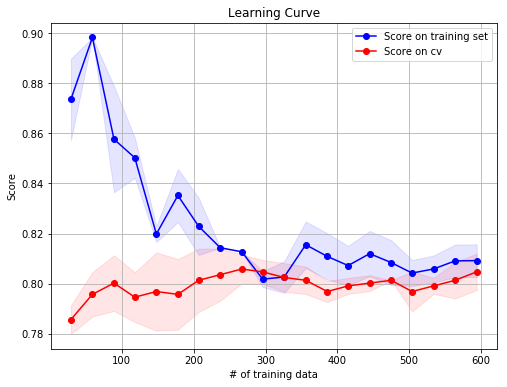

(0.80656968448540245, 0.018258876711338634)

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# use sklearn get the training_score, cv_score, then use matplotlib to draw learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """ 
    estimator : classifers used
    X : feature in numpy array
    y : target vector
    ylim : tuple value(ymin, ymax), 
    cv : # of subset in cross-validation, default value = 3
    n_jobs : number of parallel jobs
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure(figsize=(8,6))
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"# of training data")
        plt.ylabel(u"Score")
        plt.gca().invert_yaxis()
        plt.grid()
    
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"Score on training set")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"Score on cv")
    
        plt.legend(loc="best")
        
        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(clf, u"Learning Curve", X, y)

** Model is not overfitting ** 

## Cross Validation 

In [493]:
pd.DataFrame({"columns":list(train_df.columns)[1:], "coef":list(clf.coef_.T)})

,coef,columns
0,[-0.344189431858],SibSp
1,[-0.104924350555],Parch
2,[0.0],Cabin_No
3,[0.902071479485],Cabin_Yes
4,[0.0],Embarked_C
5,[0.0],Embarked_Q
6,[-0.417226462259],Embarked_S
7,[1.95649520339],Sex_female
8,[-0.677484871046],Sex_male
9,[0.341226064445],Pclass_1


In [92]:
from sklearn import cross_validation

clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
all_data = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
X = all_data.as_matrix()[:,1:]
y = all_data.as_matrix()[:,0]
print (cross_validation.cross_val_score(clf, X, y, cv=5))


[ 0.81564246  0.81564246  0.78651685  0.78651685  0.81355932]


In [94]:
# split the date 
split_train, split_cv = cross_validation.train_test_split(df, test_size=0.3, random_state=0)
train_df = split_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')

clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(train_df.as_matrix()[:,1:], train_df.as_matrix()[:,0])

cv_df = split_cv.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(cv_df.as_matrix()[:,1:])


In [95]:
split_cv[ predictions != cv_df.as_matrix()[:,0]]

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
298,299,1,41.574877,0,0,30.5000,0,1,0,0,1,0,1,1,0,0,0.875610,-0.034314
14,15,0,14.000000,0,0,7.8542,1,0,0,0,1,1,0,0,0,1,-1.148636,-0.490280
803,804,1,0.420000,0,1,8.5167,1,0,1,0,0,0,1,0,0,1,-2.145531,-0.476941
474,475,0,22.000000,0,0,9.8375,1,0,0,0,1,1,0,0,0,1,-0.561363,-0.450347
642,643,0,2.000000,3,2,27.9000,1,0,0,0,1,1,0,0,0,1,-2.029545,-0.086664
55,56,1,44.064830,0,0,35.5000,0,1,0,0,1,0,1,1,0,0,1.058395,0.066360
587,588,1,60.000000,1,1,79.2000,0,1,1,0,0,0,1,1,0,0,2.228181,0.946246
740,741,1,38.426632,0,0,30.0000,0,1,0,0,1,0,1,1,0,0,0.644500,-0.044381
839,840,1,50.910950,0,0,29.7000,0,1,1,0,0,0,1,1,0,0,1.560963,-0.050421
301,302,1,23.312621,2,0,23.2500,1,0,0,1,0,0,1,0,0,1,-0.465005,-0.180290


In [96]:
#split_cv['PredictResult'] = predictions
origin_data_train = pd.read_csv("train.csv")
bad_cases = origin_data_train.loc[origin_data_train['PassengerId'].isin(split_cv[predictions != cv_df.as_matrix()[:,0]]['PassengerId'].values)]
bad_cases.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,NaN,S
113,114,0,3,"Jussila, Miss. Katriina",female,20.0,1,0,4136,9.8250,NaN,S
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,A/5 3540,8.0500,NaN,S
240,241,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C


** Exam the bad cases ** where we need to improve?<br><br>

Some optimisation in feature engineering: 
* impute missing age based on title "Mr", "Mrs", "Miss", and choose the mean of each type
* Treat age as discrete feature and use age range to transform it 
* develop grouped faeture of Pclass and Sex
* add **Child** prefix and **Mother** prefix

In [97]:
# cloud be male
data_train[data_train['Name'].str.contains("Major")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.50,Yes,S
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.55,Yes,S


In [546]:
data_train = pd.read_csv("train.csv")
data_train['Sex_Pclass'] = data_train.Sex + "_" + data_train.Pclass.map(str)

data_train, rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)

dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_train['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix= 'Pclass')
dummies_Sex_Pclass = pd.get_dummies(data_train['Sex_Pclass'], prefix= 'Sex_Pclass')


df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass, dummies_Sex_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Sex_Pclass'], axis=1, inplace=True)
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(df['Age'])
df['Age_scaled'] = scaler.fit_transform(df['Age'], age_scale_param)
fare_scale_param = scaler.fit(df['Fare'])
df['Fare_scaled'] = scaler.fit_transform(df['Fare'], fare_scale_param)

from sklearn import linear_model

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*')
train_np = train_df.as_matrix()


y = train_np[:, 0]
X = train_np[:, 1:]

clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0)

In [543]:
data_test = pd.read_csv("test.csv")
data_test.loc[ (data_test.Fare.isnull()), 'Fare' ] = 0
data_test['Sex_Pclass'] = data_test.Sex + "_" + data_test.Pclass.map(str)

data_test, rfr = set_missing_ages(data_test)
data_test = set_Cabin_type(data_test)
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')
dummies_Sex_Pclass = pd.get_dummies(data_test['Sex_Pclass'], prefix= 'Sex_Pclass')


df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass, dummies_Sex_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Sex_Pclass'], axis=1, inplace=True)
df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'], age_scale_param)
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'], fare_scale_param)
df_test.head(10)

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,...,Pclass_2,Pclass_3,Sex_Pclass_female_1,Sex_Pclass_female_2,Sex_Pclass_female_3,Sex_Pclass_male_1,Sex_Pclass_male_2,Sex_Pclass_male_3,Age_scaled,Fare_scaled
0,892,34.500000,0,0,7.8292,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0.307495,-0.496637
1,893,47.000000,1,0,7.0000,1,0,0,0,1,...,0,1,0,0,1,0,0,0,1.256225,-0.511497
2,894,62.000000,0,0,9.6875,1,0,0,1,0,...,1,0,0,0,0,0,1,0,2.394702,-0.463335
3,895,27.000000,0,0,8.6625,1,0,0,0,1,...,0,1,0,0,0,0,0,1,-0.261743,-0.481704
4,896,22.000000,1,1,12.2875,1,0,0,0,1,...,0,1,0,0,1,0,0,0,-0.641235,-0.416740
5,897,14.000000,0,0,9.2250,1,0,0,0,1,...,0,1,0,0,0,0,0,1,-1.248423,-0.471623
6,898,30.000000,0,0,7.6292,1,0,0,1,0,...,0,1,0,0,1,0,0,0,-0.034048,-0.500221
7,899,26.000000,1,1,29.0000,1,0,0,0,1,...,1,0,0,0,0,0,1,0,-0.337642,-0.117238
8,900,18.000000,0,0,7.2292,1,0,1,0,0,...,0,1,0,0,1,0,0,0,-0.944829,-0.507390
9,901,21.000000,2,0,24.1500,1,0,0,0,1,...,0,1,0,0,0,0,0,1,-0.717134,-0.204154


In [545]:
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_predictions2.csv", index=False)

## Ensemble Models 

In [ ]:
from sklearn.ensemble import BaggingRegressor

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
train_np = train_df.as_matrix()


y = train_np[:, 0]
X = train_np[:, 1:]

# fit到BaggingRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
bagging_clf = BaggingRegressor(clf, n_estimators=10, max_samples=0.8, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=-1)
bagging_clf.fit(X, y)

test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
predictions = bagging_clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("/Users/MLS/Downloads/logistic_regression_predictions2.csv", index=False)

<font color=red>下面是咱们用别的分类器解决这个问题的代码：</font>

In [1]:
import numpy as np
import pandas as pd
from pandas import  DataFrame
from patsy import dmatrices
import string
from operator import itemgetter
import json
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import GridSearchCV
from sklearn.cross_validation import train_test_split,StratifiedShuffleSplit,StratifiedKFold
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.externals import joblib

##Read configuration parameters

train_file="train.csv"
MODEL_PATH="./"
test_file="test.csv"
SUBMISSION_PATH="./"
seed= 0


# 输出得分
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

#清理和处理数据
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if big_string.find(substring) != -1:
            return substring
    print (big_string)
    return np.nan

le = preprocessing.LabelEncoder()
enc=preprocessing.OneHotEncoder()

def clean_and_munge_data(df):
    #处理缺省值
    df.Fare = df.Fare.map(lambda x: np.nan if x==0 else x)
    #处理一下名字，生成Title字段
    title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                'Don', 'Jonkheer']
    df['Title']=df['Name'].map(lambda x: substrings_in_string(x, title_list))

    #处理特殊的称呼，全处理成mr, mrs, miss, master
    def replace_titles(x):
        title=x['Title']
        if title in ['Mr','Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
            return 'Mr'
        elif title in ['Master']:
            return 'Master'
        elif title in ['Countess', 'Mme','Mrs']:
            return 'Mrs'
        elif title in ['Mlle', 'Ms','Miss']:
            return 'Miss'
        elif title =='Dr':
            if x['Sex']=='Male':
                return 'Mr'
            else:
                return 'Mrs'
        elif title =='':
            if x['Sex']=='Male':
                return 'Master'
            else:
                return 'Miss'
        else:
            return title

    df['Title']=df.apply(replace_titles, axis=1)

    #看看家族是否够大，咳咳
    df['Family_Size']=df['SibSp']+df['Parch']
    df['Family']=df['SibSp']*df['Parch']


    df.loc[ (df.Fare.isnull())&(df.Pclass==1),'Fare'] =np.median(df[df['Pclass'] == 1]['Fare'].dropna())
    df.loc[ (df.Fare.isnull())&(df.Pclass==2),'Fare'] =np.median( df[df['Pclass'] == 2]['Fare'].dropna())
    df.loc[ (df.Fare.isnull())&(df.Pclass==3),'Fare'] = np.median(df[df['Pclass'] == 3]['Fare'].dropna())

    df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

    df['AgeFill']=df['Age']
    mean_ages = np.zeros(4)
    mean_ages[0]=np.average(df[df['Title'] == 'Miss']['Age'].dropna())
    mean_ages[1]=np.average(df[df['Title'] == 'Mrs']['Age'].dropna())
    mean_ages[2]=np.average(df[df['Title'] == 'Mr']['Age'].dropna())
    mean_ages[3]=np.average(df[df['Title'] == 'Master']['Age'].dropna())
    df.loc[ (df.Age.isnull()) & (df.Title == 'Miss') ,'AgeFill'] = mean_ages[0]
    df.loc[ (df.Age.isnull()) & (df.Title == 'Mrs') ,'AgeFill'] = mean_ages[1]
    df.loc[ (df.Age.isnull()) & (df.Title == 'Mr') ,'AgeFill'] = mean_ages[2]
    df.loc[ (df.Age.isnull()) & (df.Title == 'Master') ,'AgeFill'] = mean_ages[3]

    df['AgeCat']=df['AgeFill']
    df.loc[ (df.AgeFill<=10) ,'AgeCat'] = 'child'
    df.loc[ (df.AgeFill>60),'AgeCat'] = 'aged'
    df.loc[ (df.AgeFill>10) & (df.AgeFill <=30) ,'AgeCat'] = 'adult'
    df.loc[ (df.AgeFill>30) & (df.AgeFill <=60) ,'AgeCat'] = 'senior'

    df.Embarked = df.Embarked.fillna('S')


    df.loc[ df.Cabin.isnull()==True,'Cabin'] = 0.5
    df.loc[ df.Cabin.isnull()==False,'Cabin'] = 1.5

    df['Fare_Per_Person']=df['Fare']/(df['Family_Size']+1)

    #Age times class

    df['AgeClass']=df['AgeFill']*df['Pclass']
    df['ClassFare']=df['Pclass']*df['Fare_Per_Person']


    df['HighLow']=df['Pclass']
    df.loc[ (df.Fare_Per_Person<8) ,'HighLow'] = 'Low'
    df.loc[ (df.Fare_Per_Person>=8) ,'HighLow'] = 'High'



    le.fit(df['Sex'] )
    x_sex=le.transform(df['Sex'])
    df['Sex']=x_sex.astype(np.float)

    le.fit( df['Ticket'])
    x_Ticket=le.transform( df['Ticket'])
    df['Ticket']=x_Ticket.astype(np.float)

    le.fit(df['Title'])
    x_title=le.transform(df['Title'])
    df['Title'] =x_title.astype(np.float)

    le.fit(df['HighLow'])
    x_hl=le.transform(df['HighLow'])
    df['HighLow']=x_hl.astype(np.float)


    le.fit(df['AgeCat'])
    x_age=le.transform(df['AgeCat'])
    df['AgeCat'] =x_age.astype(np.float)

    le.fit(df['Embarked'])
    x_emb=le.transform(df['Embarked'])
    df['Embarked']=x_emb.astype(np.float)

    df = df.drop(['PassengerId','Name','Age','Cabin'], axis=1) #remove Name,Age and PassengerId


    return df

#读取数据
traindf=pd.read_csv(train_file)
##清洗数据
df=clean_and_munge_data(traindf)
########################################formula################################
 
formula_ml='Survived~Pclass+C(Title)+Sex+C(AgeCat)+Fare_Per_Person+Fare+Family_Size' 

y_train, x_train = dmatrices(formula_ml, data=df, return_type='dataframe')
y_train = np.asarray(y_train).ravel()
print (y_train.shape,x_train.shape)

##选择训练和测试集
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2,random_state=seed)
#初始化分类器
clf=RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=5, min_samples_split=1,
  min_samples_leaf=1, max_features='auto',    bootstrap=False, oob_score=False, n_jobs=1, random_state=seed,
  verbose=0)

###grid search找到最好的参数
param_grid = dict( )
##创建分类pipeline
pipeline=Pipeline([ ('clf',clf) ])
grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose=3,scoring='accuracy',\
cv=StratifiedShuffleSplit(Y_train, n_iter=10, test_size=0.2, train_size=None, indices=None, \
random_state=seed, n_iterations=None)).fit(X_train, Y_train)
# 对结果打分
print("Best score: %0.3f" % grid_search.best_score_)
print(grid_search.best_estimator_)
report(grid_search.grid_scores_)
 
print('-----grid search end------------')
print ('on all train set')
scores = cross_val_score(grid_search.best_estimator_, x_train, y_train,cv=3,scoring='accuracy')
print scores.mean(),scores
print ('on test set')
scores = cross_val_score(grid_search.best_estimator_, X_test, Y_test,cv=3,scoring='accuracy')
print scores.mean(),scores

# 对结果打分

print(classification_report(Y_train, grid_search.best_estimator_.predict(X_train) ))
print('test data')
print(classification_report(Y_test, grid_search.best_estimator_.predict(X_test) ))

model_file=MODEL_PATH+'model-rf.pkl'
joblib.dump(grid_search.best_estimator_, model_file)

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-1-60ef4fa33208>, line 25)